In [1]:
# import necessary library
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
def load_dataframe(path=None, nrows=100000):
    if not path:
        path = '~/data_analysis/data/tappware/dnothi/offices.csv'
    return pd.read_csv(path, nrows=nrows)

In [4]:
df = load_dataframe()
df.shape

(11376, 28)

In [5]:
df.head()

,id,office_ministry_id,office_layer_id,custom_layer_id,office_origin_id,office_name_eng,office_name_bng,geo_division_id,geo_district_id,geo_upazila_id,geo_union_id,office_address,digital_nothi_code,reference_code,office_code,office_phone,office_mobile,office_fax,office_email,office_web,parent_office_id,active_status,unit_organogram_edit_option,unit_organogram_edit_option_status_updated_at,created_by,modified_by,created,modified
0,3,5,22,NaN,16,"Office of the Deputy Commissionar, Chittagong","জেলা প্রশাসকের কার্যালয়, চট্টগ্রাম",2,10,0,0,"জেলা প্রশাসকের কার্যালয়, চট্টগ্রাম",০৫.৪২.১৫০০,NaN,৪২,০৩১- ৬১৯৯৯৬,01713104332,"৮৮-০৩১-৬২০৫৭০, ৮৮-০৩১-৬৩৫২৭২",dcchittagong@mopa.gov.bd,www.chittagong.gov.bd,10,1,3.0,2019-10-22 20:28:32,0,0,2015-08-02 12:10:01,2019-10-22 14:28:32
1,5,5,21,NaN,15,"Office of the Divisional Commissioner, Dhaka","বিভাগীয় কমিশনারের কার্যালয়, ঢাকা",3,18,0,0,"১ম ১২তলা সরকারি অফিস ভবন\r\nসেগুনবাগিচা, ঢাকা",05.41.3000,NaN,NaN,+৮৮০ ২ ৯৩৫০৮৪৪,01711468104,+৮৮০ ২ ৯৩৪৯৯৯৯,divcomdhaka@mopa.gov.bd,www.dhakadiv.gov.bd,8,1,3.0,2019-11-25 16:17:53,1,0,2015-08-13 03:51:02,2019-11-25 10:17:53
2,6,5,22,NaN,16,"Office of the Deputy Commissionar, Narsingdi","জেলা প্রশাসকের কার্যালয়, নরসিংদী",3,29,0,0,NaN,০৫.৩০.৬৮০০,NaN,NaN,+৮৮০২৯৪৬২৫০০,NaN,+৮৮০২৯৪৬৪৪৩৩,dcnarsingdi@mopa.gov.bd,http://www.narsingdi.gov.bd,5,1,3.0,2019-10-22 20:28:35,0,0,2015-08-13 03:53:42,2019-10-22 14:28:35
3,8,5,19,NaN,12,Ministry of Public Administration,জনপ্রশাসন মন্ত্রণালয়,3,18,0,0,NaN,০৫.০০.০০০০,NaN,০৫,NaN,NaN,NaN,info@mopa.gov.bd,www.mopa.gov.bd,0,1,3.0,2019-10-13 16:36:18,0,0,2015-08-13 11:50:28,2019-10-13 10:36:18
4,9,5,23,NaN,17,"Office of the Upazila Nirbahi Officer, Rangunia","উপজেলা নির্বাহী অফিসারের কার্যালয়, রাঙ্গুনিয়া,...",2,10,0,0,"উপজেলা নির্বাহী অফিসারের কার্যালয়, রাঙ্গুনিয়া,...",০৫.৪২.১৫৭০,NaN,NaN,০৩০২৫৫৬০০১,01716147056,০৩০২৫৫৬০১০,unorangunia@mopa.gov.bd,http://rangunia.chittagong.gov.bd,3,1,NaN,NaN,0,0,2015-08-14 13:59:36,2019-12-01 12:27:53


In [6]:
# data summary
# df.info()
df.columns

Index(['id', 'office_ministry_id', 'office_layer_id', 'custom_layer_id',
       'office_origin_id', 'office_name_eng', 'office_name_bng',
       'geo_division_id', 'geo_district_id', 'geo_upazila_id', 'geo_union_id',
       'office_address', 'digital_nothi_code', 'reference_code', 'office_code',
       'office_phone', 'office_mobile', 'office_fax', 'office_email',
       'office_web', 'parent_office_id', 'active_status',
       'unit_organogram_edit_option',
       'unit_organogram_edit_option_status_updated_at', 'created_by',
       'modified_by', 'created', 'modified'],
      dtype='object')

In [9]:

df.geo_division_id.value_counts()

3    2570
2    2097
5    1584
4    1408
6    1201
1     939
7     855
9     722
Name: geo_division_id, dtype: int64


### General Insights / General questions we can answer:
- কোন নির্দিষ্ট সালে/মাসে/দিনে কতগুলো অফিস যুক্ত হয়েছে।
- অ্যকটিভ ও নন-অ্যাকটিভ অফিস এর অনুপাত।
- কোন বিভাগ এ বেশি অফিস রেজিস্টাড করা হয়েছে এবং তাদের অনুপাত।

### Business Insights / Questions we can explore:
- কোন অফিস / অফিস গুলো কেন ডি-অ্যাকটিভ করা হয়েছে।


### বছর ভিত্তিক অফিস সংখ্যা

In [28]:
df_office_count = df[['id', 'created']].copy(deep=True)
df_office_count['created'] = pd.to_datetime(df_office_count.created)
df_office_count = df_office_count.groupby(df_office_count.created.dt.year).size().reset_index(name='counts')
df_office_count

,created,counts
0,2015,41
1,2016,2703
2,2017,2907
3,2018,1864
4,2019,2583
5,2020,990
6,2021,288


<BarContainer object of 7 artists>

Text(0.5, 1.0, 'number of office by year')

Text(0, 0.5, 'number of office')

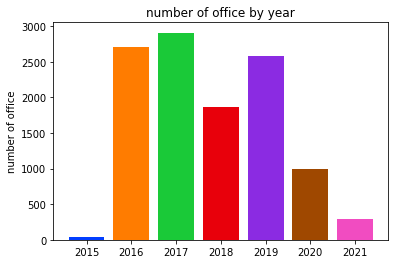

In [34]:
fig, ax = plt.subplots()

labels = []
for year in df_office_count.created.values:
    labels.append(str(year))
    
height = df_office_count.counts.values

# Define searborn color palette to use
colors = sns.color_palette('bright')[0:len(labels)]


ax.bar(labels, height,  color=colors)
ax.set_title('number of office by year')
ax.set_ylabel('number of office')
# ax.legend()
plt.show()

In [35]:
df_office_count_cummulative =  df_office_count
df_office_count_cummulative['counts'] =  df_office_count_cummulative.counts.cumsum()
# df_office_count_cummulative =  df_office_count

<BarContainer object of 7 artists>

Text(0.5, 1.0, 'number of office by year')

Text(0, 0.5, 'number of office')

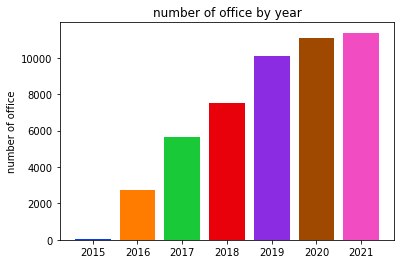

In [38]:
fig, ax = plt.subplots()

labels = []
for year in df_office_count_cummulative.created.values:
    labels.append(str(year))
    
height = df_office_count_cummulative.counts.values

# Define searborn color palette to use
colors = sns.color_palette('bright')[0:len(labels)]


ax.bar(labels, height,  color=colors)
# ax.plot(labels, height,  color=colors)
ax.set_title('number of office by year')
ax.set_ylabel('number of office')
# ax.legend()
plt.show()

### অ্যাকটিভ ও নন-অ্যাকটিভ অফিস এর অনুপাত

In [16]:
df.groupby('active_status').size().reset_index(name='counts')


,active_status,counts
0,0,3157
1,1,8219


[None, None, None, None]

Text(0.5, 1.0, 'active vs deactive office')

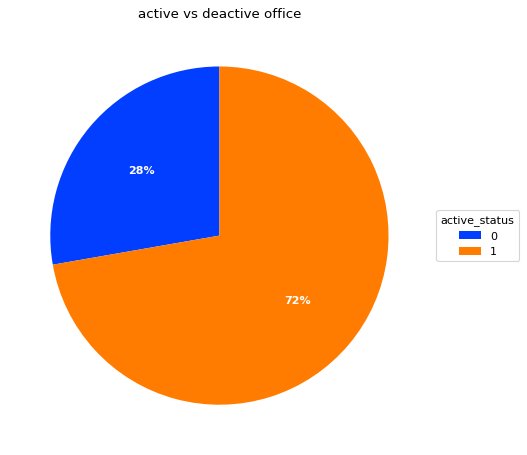

In [20]:
df_active_deactive_office = df.groupby('active_status').size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(14, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

# Define searborn color palette to use
colors = sns.color_palette('bright')[0:5]
# colors = sns.color_palette('pastel')[0:5]
wedges, texts, autotexts = ax.pie(df_active_deactive_office['counts'], 
                                  autopct='%.0f%%',
                                  textprops=dict(color="w"), 
                                  colors=colors,
                                  startangle=90,
                                 )

_ = ax.legend(wedges, df_active_deactive_office['active_status'], title="active_status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight=700)
ax.set_title("active vs deactive office")

plt.show()

### বিভাগ ভিত্তিক অফিস সংখ্যা

In [27]:
df.groupby('geo_division_id').size().reset_index(name='number').sort_values(by=['number'], ascending=False)

,geo_division_id,number
2,3,2570
1,2,2097
4,5,1584
3,4,1408
5,6,1201
0,1,939
6,7,855
7,9,722
